# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [23]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [26]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

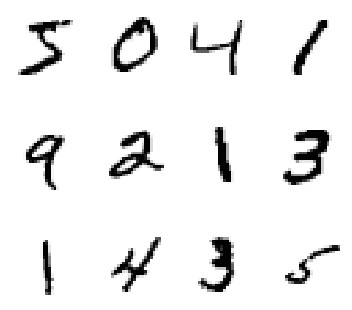

In [27]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Preprocess data

In [28]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [29]:
X_train /= 255
X_valid /= 255

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
n_classes = 10

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# One-hot encoding in Keras
y_train = to_categorical(y_train, n_classes)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# One-hot encoding in Keras
y_valid = to_categorical(y_valid, n_classes)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Design neural network architecture

In [32]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # 28x28 -> 64 hidden
model.add(Dense(10, activation='softmax')) # Output

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [34]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [35]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0920 - accuracy: 0.0914 - val_loss: 0.0914 - val_accuracy: 0.1028
Epoch 2/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0911 - accuracy: 0.1161 - val_loss: 0.0907 - val_accuracy: 0.1416
Epoch 3/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0905 - accuracy: 0.1535 - val_loss: 0.0902 - val_accuracy: 0.1767
Epoch 4/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0900 - accuracy: 0.1798 - val_loss: 0.0897 - val_accuracy: 0.2019
Epoch 5/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0896 - accuracy: 0.2021 - val_loss: 0.0894 - val_accuracy: 0.2261
Epoch 6/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0893 - accuracy: 0.2253 - val_loss: 0.0891 - val_accuracy: 0.2485
Epoch 7/200
60000/60000 [=========================

Epoch 55/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0715 - accuracy: 0.6301 - val_loss: 0.0709 - val_accuracy: 0.6424
Epoch 56/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0710 - accuracy: 0.6343 - val_loss: 0.0703 - val_accuracy: 0.6473
Epoch 57/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0705 - accuracy: 0.6387 - val_loss: 0.0698 - val_accuracy: 0.6509
Epoch 58/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0700 - accuracy: 0.6426 - val_loss: 0.0693 - val_accuracy: 0.6560
Epoch 59/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0694 - accuracy: 0.6471 - val_loss: 0.0687 - val_accuracy: 0.6593
Epoch 60/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0689 - accuracy: 0.6513 - val_loss: 0.0682 - val_accuracy: 0.6631
Epoch 61/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0684 - ac

60000/60000 [==============================] - 1s 16us/sample - loss: 0.0458 - accuracy: 0.7685 - val_loss: 0.0449 - val_accuracy: 0.7848
Epoch 110/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0455 - accuracy: 0.7711 - val_loss: 0.0445 - val_accuracy: 0.7870
Epoch 111/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0451 - accuracy: 0.7736 - val_loss: 0.0442 - val_accuracy: 0.7900
Epoch 112/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0448 - accuracy: 0.7757 - val_loss: 0.0438 - val_accuracy: 0.7931
Epoch 113/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0444 - accuracy: 0.7781 - val_loss: 0.0435 - val_accuracy: 0.7951
Epoch 114/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0441 - accuracy: 0.7806 - val_loss: 0.0432 - val_accuracy: 0.7976
Epoch 115/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0438 - accuracy:

Epoch 163/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0324 - accuracy: 0.8411 - val_loss: 0.0314 - val_accuracy: 0.8541
Epoch 164/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0323 - accuracy: 0.8418 - val_loss: 0.0312 - val_accuracy: 0.8545
Epoch 165/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0321 - accuracy: 0.8422 - val_loss: 0.0310 - val_accuracy: 0.8555
Epoch 166/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0319 - accuracy: 0.8428 - val_loss: 0.0309 - val_accuracy: 0.8558
Epoch 167/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0318 - accuracy: 0.8433 - val_loss: 0.0307 - val_accuracy: 0.8562
Epoch 168/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0316 - accuracy: 0.8442 - val_loss: 0.0306 - val_accuracy: 0.8566
Epoch 169/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.03

#### Evaluating model performance

In [36]:
model.evaluate(X_valid, y_valid)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.02649305644482374, 0.869]

#### Performing inference

In [37]:
valid_0 = X_valid[0].reshape(1, 784)

In [38]:
model.predict(valid_0)

array([[0.00550303, 0.00144452, 0.00477352, 0.01325655, 0.00655514,
        0.01191534, 0.00124728, 0.9019584 , 0.00616694, 0.04717929]],
      dtype=float32)

In [39]:
model.predict_classes(valid_0)

array([7])